# 10. Interest Rate Futures

In [3]:
from fixedincome2025 import table

## Types of Interest Rate Futures

* Reference: Section 6.3 of Options, Futures, and Other Derivatives 11th Edition by John Hull, Sankarshan Basu
* Futures are exchange products
* There is a margin mechanism to avoid default risk
* In the U.S., by far the most pupolar interest rate futures are
    * Treasury futures
    * SOFR futures
* Both products of the CME group

## Treasury Futures Overview

* Historical note: Treasury futures were CBOT (Chicago Board of Trade) products. CBOT merged with CME (Chicago Mercantile Exchange) in 2007 to form the current CME group
* Contract size: One contract involves the delivery of $\$100,000$ face value of the bonds
* Settlement: Physical, meaning if you are long you actually get T-bonds on delivery date, not cash

* Delivery date
    * There is not a set delivery date. The party with a short position can choose to deliver on any business day of the contract month

## Deliverable Bonds

* A typical futures contract requires one party to deliver a specified quantity of the underlying commodity (think of [15,000 pounds of frozen concentrated orange juice](https://www.ice.com/products/30/FCOJ-A-Futures)) to the other on the delivery date
* But there are so many treasuries with various dates and coupon rates this won't work
* Treasury futures are structured in a way that, all *similar* treasuries can be delivered
    * But for a single futures contract you must deliver a single eligible bond; you cannot split one contract's delivery across two different bonds

## Quotes

* Treasury bond futures prices are quoted int he same way as the Treasury bond prices (the spot market)
* Quotes are in dollars and 32nds of a dollar per $\$100$ face value
    * $110$-$03$ means $\$110\frac{3}{32}$ for a T-bond with face value $\$100$
    * One futures contract represents $\$100,000$ face value of the delivered bonds so $1,000$ such bonds with face value $\$100$
    * If the quoted price dropded by $\$1$, say from $110$-$03$ to $109$-$03$, the holder of a futures contract lose $\$1,000$

## 6 Types of Treasury Futures

* What bonds are deliverable? 

In [14]:
table('treasury_futures')

,Ticker,Remaining Term,Original Term,Notes
2-Year T-Note Futures,ZTZ5,"[1y9m, 2y]",<= 5y3m,
5-Year T-Note Futures,ZFZ5,>= 4y2m,<= 5y3m,
10-Year T-Note Futures,ZNZ5,"[6.5y, 8y]",,
Ultra 10-Year U.S. T-Note Futures,TNZ5,"[9y5m, 10y]",10y,
U.S. T-Bond Futures,ZBZ5,"[15y, 25y)",,Can be callable
Ultra U.S. T-Bond Futures,UBZ5,>= 25y,,


$$
$$
* The remaining term is counting from the first day of the contract delivery month Dec 2025
* For specs of Treasury futures, see [cmegroup.com](https://www.cmegroup.com/) > MARKETS > Interest Rates > U.S. Treasuries
    * More detailed spec in the [rule book](https://www.cmegroup.com/rulebook/CBOT/), for example [Chapter 18](https://www.cmegroup.com/rulebook/CBOT/II/18.pdf) for ZBZ5

## Delivery Month Code

* ZBZ5 means Dec 2025 contract, ZBH6 means Mar 2025 contract, etc.

$$
$$

| Code | Month | Code | Month | Code | Month |
|:-----|:------|:-----|:------|:-----|:------|
| F | January | G | February | H | March |
| J | April | K | May | M | June |
| N | July | Q | August | U | September |
| V | October | X | November | Z | December |

$$
$$

* There are **quarterly futures** for March, June, September and December (HMUZ) and **serial futures** for other "off-quarter" months
* For Treasury futures, only quarterly are trading. For SOFR futures, serial are also trading

## Conversion Factor

* Because you can choose to deliver from a basket of bonds, it wouldn't make sense to settle all contracts with one single futures settlement price. It has to be adjusted
* Cash received by the short when a bond is delivered is
$$
(\text{Futures settlement} \times \text{Conversion factor}) + \text{Accrued interest}
$$
* Futures settlement is the most recent futures settlement price
* Roughly speaking, the conversion factor should be larger when the delivered bonds are more expensive

## Conversion Factor: Example

$$
$$
$$
(\text{Futures Settlement} \times \text{Conversion Factor}) + \text{Accrued Interest}
$$
* Assuming
    * Settlement price is $90$-$00$
    * Conversion factor for the bond delivered is $1.38$
    * Accrued interest on this bond at the time of delivery is $\$3$ per $\$100$ face value
* Cash received by the party with the short position is
$$
(90.00\times 1.3800) + 3.00 = \$127.20
$$
per $\$100$ face value. Since one contract delivers bonds with a face value of $\$100,000$, overall cash received is $\$127,200$

## Computing the Conversion Factor

* The conversion factor for a bond is equal to the quoted price the bond would have per dollar of principal on the first day of the delivery month on the assumption that the interest rate for all maturities equals $6\%$ per annum (with semiannual compounding)

* The bond maturity and the times to the coupon payment dates are rounded down to the nearest 3 months

* If, after rounding, the bond lasts for an exact number of 6-month periods, the first coupon is assumed to be paid in 6 months

* If, after rounding, the bond does not last for an exact number of 6-month periods (i.e., there are an extra 3 months), the first coupon is assumed to be paid in 3 months and accrued interest is subtracted

## Computing the Conversion Factor: Example

* Consider a $10\%$ coupon bond with 20 years and 2 months to maturity
    * Each semiannual coupon payment is $5\%$
* First round down to 20 years
* Assuming face value is $\$100$, when the annualized discount rate is $6\%$ (or $3\%$ semiannually), the value of the bond is
$$
\sum_{j=1}^{40}\frac{5}{1.03^j} + \frac{100}{1.03^{40}} = \$146.23
$$
* Dividing by the face value gives a conversion factor of $1.4623$

## Cheapest-To-Deliver (CTD) Bond

* The conversion factors only roughly adjust the differences of deliverable bonds. There is still one that's the cheapest to deliver
* The party with a short position needs to deliver the bonds and receive cash
$$
(\text{Futures Settlement} \times \text{Conversion Factor}) + \text{Accrued Interest}
$$

* The party can deliver the bonds it just purchased in the market at
$$
\text{Quoted Bond Price} + \text{Accrued Interest}
$$

* The cost to do so is therefore
$$
\text{Quoted Bond Price} - (\text{Futures Settlement} \times \text{Conversion Factor})
$$

* The party should (and will) choose the bond that minimizes the cost to deliver

## CTD Bond: Example

* Assuming the most recent futures settlement price is $93$-$08$, or $93.25$ and we have 3 deliverable bonds as below: 

In [16]:
table('ctd_bond')

,Quoted Price ($),Conversion Factor
Bond 1,99.50,1.0382
Bond 2,143.50,1.5188
Bond 3,119.75,1.2615


* The cost of delivering each is
\begin{align*}
&\text{Bond 1: }\quad 99.5 - (93.25\times 1.0382) = \$2.69\\
&\text{Bond 2: }\quad 143.5 - (93.25\times 1.5188) = \$1.87\\
&\text{Bond 3: }\quad 119.75 - (93.25\times 1.2615) = \$2.12\\
\end{align*}
* The CTD bond is Bond 2

## SOFR Futures

* There are two types of SOFR futures listed in the CME Group: 3M SOFR futures (quarterly) and 1M SOFR futures (serial)
* Both liquid but [quarterly](https://www.cmegroup.com/markets/interest-rates/stirs/three-month-sofr.quotes.html) are more so than [serial](https://www.cmegroup.com/markets/interest-rates/stirs/one-month-sofr.quotes.html)
* Settlement: Cash settled

## 3M SOFR Futures

* Using Dec 2025 contract as an example (SR3Z5)
* Settlement date is Mar 2026 IMM date (3rd Wednesday)
* Settlement price is $100 - R^*$, where
$$
R^*/100 = \frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right)
$$
is the SOFR term rate, the compounded daily SOFR fixings $r_j$, from (and including) the Dec 2025 IMM date to (but not including) the Mar 2026 IMM date
    * $R^*$ is unkown until one day before the Mar 2026 IMM date

## IMM Date

* 3rd Wednesday of March, June, September and December
* Very unlikely to be a holiday
* A rare exception was 2024 Juneteenth (6/19)
    * Former president Joe Biden recognized the Juneteenth as a federal holiday and signed into law in 2021

## 3M SOFR Futures (Cont.)

* The 3m period from Dec 2025 IMM date to Mar 2026 IMM date is called the reference quarter
    * The contract month Dec 2025 marks the **beginning** of the reference quarter
* A contract is still trading in its reference quarter, which is not possible for a forward looking rate like LIBOR
* Quotes are also in the form $100 - R$
    * A quoted price of $96.25$ means $R=3.75$ and the futures rate is $0.0375 = 3.75\%$
    * $96.25$ was the actual market quoted price of SR3Z5 as of EOD 10/31/2025, and $3.75\%$ was the quoted 3M SOFR futures rate

## 3M SOFR Futures PnL

* Contract size of 3M SOFR futures is $\$2,500\times (100 - R)$
* If you are long one contract, and if the futures rate is up 1bp ($R$ is up 0.01), PnL is
$$
2500\times (100 - (R+0.01)) - 2500\times (100 - R) = -\$25
$$
* If you are long one contract at $R$ (your cost), and the SOFR term rate for the reference quarter realized to be $R^*$, your overall PnL is
$$
2500\times (100 - R^*) - 2500\times (100 - R) = \$2,500\times(R-R^*)
$$
* If you are short one contract at $R$, your overall PnL is $\$2,500\times(R^*-R)$
* The $(100-R)$ quoting convention makes sure the direction is the same as holding a bond: If you are long a SOFR futures contract or if you hold a bond, you want rates to decline

## Locking In the Rate With 3M SOFR Futures

* On 10/31/2025, SR3Z5 was trading at $96.25$ with futures rate $3.75\%$
* If, on 10/31/2025, you knew you'd want to borrow $\$1,000,000$ (one million) for the future period from the Dec 2025 IMM date to the Mar 2026 IMM date, then you could lock in the rate at $3.75\%$ by short selling one SR3Z5 contract: 
    * You borrow $\$1,000,000$ on Z5 IMM with a plan to return on H6 IMM
    * If you roll the debt daily with the overnight repo rate, the interest you end up paying is 
\begin{align*}
1,000,000\times \tau \times \underbrace{\frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right)}_{\text{annualized}}
\end{align*}
    * $\tau = 1/4$ is the year fraction. As you only borrow for a quarter, you only pay interest for a quarter of a year

## Locking In the Rate With 3M SOFR Futures (Cont.)

* You borrow $\$1,000,000$ on Z5 IMM with a plan to return on H6 IMM
* If you roll the debt daily with the overnight repo rate, the interest you end up paying is 
\begin{align*}
&1,000,000\times \tau \times \frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right)\\
=& 10,000\times \tau \times 100\times\frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right) \\
=& 10,000 \times 1/4 \times R^* = \$2,500\times R^*
\end{align*}

* But short selling one futures contract, you have PnL $\$2,500\times(R^*-R)$
* Your overall cash outflow is $-2500 R^* + 2500(R^*-R) = -2500R$, so you end up paying $\$2,500\times R$ no matter what the SOFR term rate realizes to be. You have locked in the rate at $R$

* 3M SOFR Futures contract is designed to hedge the cost of a one million notional debt

## 1M SOFR Futures

* Using Feb 2026 contract as an example (SR1G6)
* Settlement date is the end of the contract month Feb 2026
* Settlement price is $100 - R$, where $R$ is arithmetic average of the daily SOFR fixings in the contract month, in percentage
    * Recall that it's compounding, not arithmetic average, for 3M SOFR futures
* Quotes are also in the form $100 - R$
* Contract size of 1M SOFR futures is $\$4,167\times(100 - R)$

## Locking In the Rate With 1M SOFR Futures: Exercise

* Contract size of 1M SOFR futures is $\$4,167\times(100 - R)$
* It's designed to hedge the cost of a debt of what notional? 

## What About FRA?

* You can also lock in the rate at $L(t, T, T+\tau)$ for the future period $[T, T+\tau]$ with the forward rate agreement (FRA)
* Does that make FRA same as the futures contract, and forward rate same as the futures rate?

* No: 
$$
\text{Futures Rate} = \text{Forward Rate} + \text{Convexity Adjustment}
$$
* The convexity adjustment is from the daily reset mechanism

## The Effect of Daily Reset

* Recall that, if you are long one 3M SOFR futures contract, on a day the futures rate is up 1bp ($R$ is up 0.01), your PnL is
$$
2500\times (100 - (R+0.01)) - 2500\times (100 - R) = -\$25
$$
* At EOD the $\$25$ will be taken from your margin account, and the value of the futures contract you hold is kept 0
* In another scenario where the rate is down 1bp, at EOD you get an extra $\$25$ cash in your margin account, and the value of the futures contract is still kept 0
* Because of the daily reset mechanism, there will be cash inflows and outflows daily
* If you are long futures contracts, your margin account has
    * More cash when rates are low
    * Less cash when rates are high
* But you also earn interest for the cash sat in the margin account

## The Effect of Daily Reset (Cont.)

* If you are long futures contracts, your margin account has
    * More cash when rates are low
    * Less cash when rates are high
* If you are short futures contracts, it's the opposite. Your margin account has 
    * Less cash when rates are low
    * More cash when rates are high
* But you also earn interest for the cash sat in the margin account

* It's clear the daily reset mechanism is in favor of the party with a short position
* Thus more people would want to short than long, driving the futures contract price lower and futures rates higher (than the corresponding forward rate)
* FRA doesn't have this feature. You pay or get paid the PnL at the end of the reference period

## Convexity Adjustment

$$
$$

\begin{align*}
\text{Futures Rate} &= \text{Forward Rate} + \text{Convexity Adjustment}\\\\
Q(t, T_1, T_2) &= L(t, T_1, T_2) + c(t, T_1, T_2), 
\end{align*}
* Here $T_2 = T_1 + \tau$, where $\tau$ can be 1m or 3m
* From the previous daily reset argument, it's clear $c$ is an increasing function of $T_1$, as you have more time to accrue the interest of the cash sat in your margin account with a longer $T_1$
* The convexity adjustment is a model dependent quantity
* With LIBOR futures (stopped trading in late 2023), there used to be a popular approximation formula derived in the Ho-Lee model: 
$$
c \approx \frac{1}{2}\sigma^2 T_1T_2, 
$$
where $\sigma$ is the annualized short rate ($r_t$) volatility
* In the SOFR world, this formula overvalues the forward futures convexity adjustment

## SOFR Futures Volatility

* Recall that for 3M SOFR futures, settlement price is $100 - R$, where
$$
R/100 = \frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right)
$$
is the compounded daily SOFR fixings in the reference quarter
* In the reference quarter, the quote becomes less volatile each day as more and more daily fixings $r_j$ are realized
* The volatility eventually goes to zero
* The same goes for 1M SOFR futures

## SOFR Futures Volatility (Cont.)

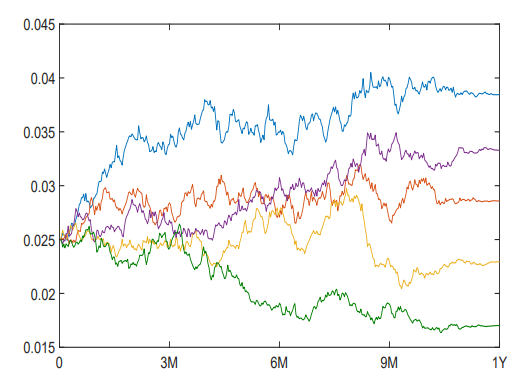

* Picture from [Lyashenko and Mercurio (2019)](https://www.deriscope.com/docs/Lyashenko_Mercurio_2019.pdf)

## Treasury Futures and SOFR Futures

* Trading Treasury futures is betting on spot rates (zero rates)
    * This will become clear if you imagin a simplified world where Treasury futures contracts only allow one specific T-bond to be delivered, there is a set delivery date, and no convertion factor
* Trading SOFR Futures is betting on forward rates $L(t, T, T+\tau)$ (or futures rates $L+\text{convexity adjustment}$ to be precise)